# Feature Engineering

In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/preprocessed_data.csv', index_col=0, parse_dates=["time"])
df.head()

,ax,gz,gx,az,gy,ay,id,side,time_diff
time,,,,,,,,,
2024-06-14 07:19:32.380,0.031798,-0.988506,-0.843705,-1.004893,0.523758,0.063902,MRBF3DNuWq0zhSXajwPy,R,NaN
2024-06-14 07:19:32.382,0.031909,-0.989812,-0.838482,-1.004933,0.519988,0.063587,MRBF3DNuWq0zhSXajwPy,R,0.002
2024-06-14 07:19:32.384,0.032016,-0.990767,-0.833668,-1.004969,0.513473,0.063274,MRBF3DNuWq0zhSXajwPy,R,0.002
2024-06-14 07:19:32.387,0.032117,-0.991283,-0.829232,-1.004998,0.503391,0.062965,MRBF3DNuWq0zhSXajwPy,R,0.003
2024-06-14 07:19:32.389,0.032212,-0.991273,-0.825124,-1.005020,0.488897,0.062665,MRBF3DNuWq0zhSXajwPy,R,0.002


In [15]:
df.describe()

,ax,gz,gx,az,gy,ay,time_diff
count,2.248628e+06,2.248628e+06,2.248628e+06,2.248628e+06,2.248628e+06,2.248628e+06,2.248627e+06
mean,1.200217e-01,-2.658855e-01,-4.722533e-01,-1.272025e+00,2.483511e-01,3.753519e-03,9.169069e-03
std,6.227705e-01,2.819690e+01,3.196942e+01,4.222818e-01,1.310447e+02,1.570025e-01,2.196743e+00
min,-2.246148e+00,-2.689279e+02,-2.742725e+02,-3.901363e+00,-4.407931e+02,-1.090997e+00,0.000000e+00
25%,-6.503511e-02,-7.226034e+00,-8.046268e+00,-1.482821e+00,-9.359933e+01,-2.504415e-02,1.000000e-03
50%,1.326400e-02,-3.780756e-01,-3.948044e-01,-1.063839e+00,2.366885e-01,2.288007e-03,1.000000e-03
75%,1.057819e-01,3.759453e+00,5.770688e+00,-1.009376e+00,4.497699e+00,4.073420e-02,2.000000e-03
max,5.292321e+00,3.681251e+02,2.536795e+02,3.389588e-01,5.722992e+02,1.692441e+00,2.097496e+03


In [16]:
# Feature Engineering - Aggregate by 'id' (session)
filtered_df = df.copy()

session_features = df.groupby("id").agg({
    "ax": ["mean", "std", "min", "max"],
    "ay": ["mean", "std", "min", "max"],
    "az": ["mean", "std", "min", "max"],
    "gx": ["mean", "std", "min", "max"],
    "gy": ["mean", "std", "min", "max"],
    "gz": ["mean", "std", "min", "max"],
    "time_diff": ["sum", "count"]  # Sum gives session duration
}).reset_index()

# Flatten MultiIndex columns
session_features.columns = ["_".join(col).strip() for col in session_features.columns.values]

# Rename time_diff features
session_features.rename(columns={"time_diff_sum": "session_duration", "time_diff_count": "num_measurements"}, inplace=True)

In [17]:
session_features.head()

,id_,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,...,gy_mean,gy_std,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements
0,033nuFnKoOjj4NeIt9FS,0.145444,0.741501,-1.342944,3.401582,-0.010195,0.150547,-0.851772,0.482592,-1.323168,...,0.333488,157.487966,-218.998214,486.046712,-1.193132,30.471472,-86.149230,95.382348,30.093,9530
1,0373xrf1eaJoc8IcE6Gc,0.061132,0.495734,-1.062639,2.495359,-0.029549,0.131597,-0.679973,0.595378,-1.243729,...,-0.010134,103.755205,-183.950040,383.738957,-9.042163,34.873215,-201.814871,89.357449,65.368,15659
2,04SwmTFshylAIDUNCYTh,0.105758,0.514041,-0.942479,2.268060,-0.011802,0.121799,-0.606354,0.408773,-1.275415,...,-0.213061,112.229767,-184.968099,361.666264,-9.321720,40.537047,-244.406251,76.938940,32.447,6806
3,0AxduuyH7QvfV841ANdD,0.177240,0.510080,-0.912595,2.606743,0.000093,0.238416,-0.974607,1.070235,-1.291537,...,1.375933,124.050586,-174.955320,336.397350,-0.070710,32.022511,-115.804366,134.667022,43.966,10892
4,0bYDrU653eQr2GwcMXXw,0.111577,0.686315,-1.324291,3.172503,0.001997,0.154302,-0.815214,0.701647,-1.305261,...,1.104361,149.520963,-222.198284,415.139153,1.278423,24.582140,-67.749976,98.354013,59.822,10892


In [18]:
session_features.shape

(234, 27)

#### Choose the Right height Value in find_peaks
in order to identify the steps <br>
article: https://medium.com/@chrisjpulliam/quickly-finding-peaks-in-mass-spectrometry-data-using-scipy-fcf3999c5057

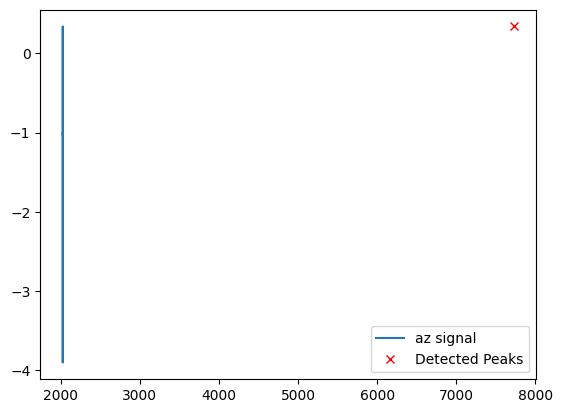

In [19]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data = df["az"]  
peaks, _ = find_peaks(data, height=0)

plt.plot(data, label="az signal")
plt.plot(peaks, data[peaks], "rx", label="Detected Peaks")  # Mark peaks with red 'x'
plt.legend()
plt.show()

looks like a lot values are less than zero. 

In [20]:
mean_az = df["az"].mean()
std_az = df["az"].std()
min_az = df["az"].min()
max_az = df["az"].max()
median_az = df["az"].median()
# because mean_az is negative
# height = abs(mean_az) + 0.5 * std_az  
height = mean_az + 0.25 * std_az  
# height = mean_az + 0.5 * std_az  
# height = median_az + 0.5 * std_az  
peaks, _ = find_peaks(df["az"], height=height)
print("peaks", peaks)
print("mean_az",mean_az)
print("median_az",median_az)
print("std_az",std_az)
print("min_az",min_az)
print("max_az",max_az)
print("height", height)

peaks [     26      73     117 ... 2248501 2248550 2248588]
mean_az -1.272025237619722
median_az -1.0638393876820151
std_az 0.4222818402255061
min_az -3.901362646549079
max_az 0.3389588151388096
height -1.1664547775633456


Worth to mention that mean and median both are negative values in az
- The 0.5 or 0.25 are scaling factor for the standard deviation.
- It determines how much above the mean we consider a peak.
- A higher factor (e.g., 1.0 or 1.5) makes peak detection stricter, requiring stronger fluctuations.

#### Peaks in acceleration (az): 
Steps often correspond to peaks in vertical acceleration. <br>
We'll count peaks in az for both left and right foot separately to estimate left_steps and right_steps.<br>
article: https://stackoverflow.com/questions/5871429/accelerometer-data-how-to-interpret <br>

Step detection can be approached using:
- Peaks in acceleration (az): Steps often correspond to peaks in vertical acceleration.
- Gyroscope (gz) thresholding: Helps track foot rotations during stepping.
- Zero-crossings in acceleration/gyroscope signals.

In [21]:
# Step Detection - Count peaks in 'az' for each foot
# another approach would be to calculate the magnitude of acceleration
# filtered_df['acc_magnitude'] = np.sqrt(filtered_df['ax']**2 + filtered_df['ay']**2 + filtered_df['az']**2)
def count_peaks(series):
    # 0.25: -1.16, 0.5: -1.06
    peaks, _ = find_peaks(series, height=-1.66)  
    return len(peaks)

# Count steps based on side (L or R)
step_counts = df.groupby(["id", "side"])["az"].apply(count_peaks).unstack(fill_value=0)

# Check if 'side' values contain 'L' (left) and 'R' (right), then assign them explicitly
if 'L' in step_counts.columns:
    step_counts['left_steps'] = step_counts['L']
else:
    step_counts['left_steps'] = 0

if 'R' in step_counts.columns:
    step_counts['right_steps'] = step_counts['R']
else:
    step_counts['right_steps'] = 0

# Remove the temporary 'L' and 'R' columns to avoid keeping them in the final output
step_counts = step_counts.drop(columns=['L', 'R'], errors='ignore')

session_features = session_features.rename(columns={"id_": "id"})
final_df = session_features.merge(step_counts, on="id")


#### Note:
in the following line of code with height=0, I got only one step in one of the measurements:<br>
`peaks, _ = find_peaks(series, height=0)` <br>
since the quartile approach of finding the height it was 0 <br>
I must agree that I need more domain expert in order analyze this situation but after going some article and ask large langue models, some were indicating that above zero considered spikes. <br><br>
Also, len(df[df'az'] > 0]) was also 15  

In [22]:
final_df.head()
# final_df.shape

,id,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,...,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements,left_steps,right_steps
0,033nuFnKoOjj4NeIt9FS,0.145444,0.741501,-1.342944,3.401582,-0.010195,0.150547,-0.851772,0.482592,-1.323168,...,-218.998214,486.046712,-1.193132,30.471472,-86.149230,95.382348,30.093,9530,102,110
1,0373xrf1eaJoc8IcE6Gc,0.061132,0.495734,-1.062639,2.495359,-0.029549,0.131597,-0.679973,0.595378,-1.243729,...,-183.950040,383.738957,-9.042163,34.873215,-201.814871,89.357449,65.368,15659,196,200
2,04SwmTFshylAIDUNCYTh,0.105758,0.514041,-0.942479,2.268060,-0.011802,0.121799,-0.606354,0.408773,-1.275415,...,-184.968099,361.666264,-9.321720,40.537047,-244.406251,76.938940,32.447,6806,85,92
3,0AxduuyH7QvfV841ANdD,0.177240,0.510080,-0.912595,2.606743,0.000093,0.238416,-0.974607,1.070235,-1.291537,...,-174.955320,336.397350,-0.070710,32.022511,-115.804366,134.667022,43.966,10892,107,116
4,0bYDrU653eQr2GwcMXXw,0.111577,0.686315,-1.324291,3.172503,0.001997,0.154302,-0.815214,0.701647,-1.305261,...,-222.198284,415.139153,1.278423,24.582140,-67.749976,98.354013,59.822,10892,118,128


In [192]:
# save the featured engineered data
import os
path_to_save = os.path.join('../data', 'feature_engineered_data.csv')
final_df.to_csv(path_to_save, index=False)

In [23]:
df.columns

Index(['ax', 'gz', 'gx', 'az', 'gy', 'ay', 'id', 'side', 'time_diff'], dtype='object')

In [24]:
final_df.columns

Index(['id', 'ax_mean', 'ax_std', 'ax_min', 'ax_max', 'ay_mean', 'ay_std',
       'ay_min', 'ay_max', 'az_mean', 'az_std', 'az_min', 'az_max', 'gx_mean',
       'gx_std', 'gx_min', 'gx_max', 'gy_mean', 'gy_std', 'gy_min', 'gy_max',
       'gz_mean', 'gz_std', 'gz_min', 'gz_max', 'session_duration',
       'num_measurements', 'left_steps', 'right_steps'],
      dtype='object')

#### Some Observation:
- Before feature engineering, the dataset contained time-indexed sensor data (ax, gz, gx, az, gy, ay), which means it was a time series.
- The time_diff column represented the time interval between measurements.
- After feature engineering, the dataset transformed into aggregated session-level statistics, and the time component was removed.




### Visualization

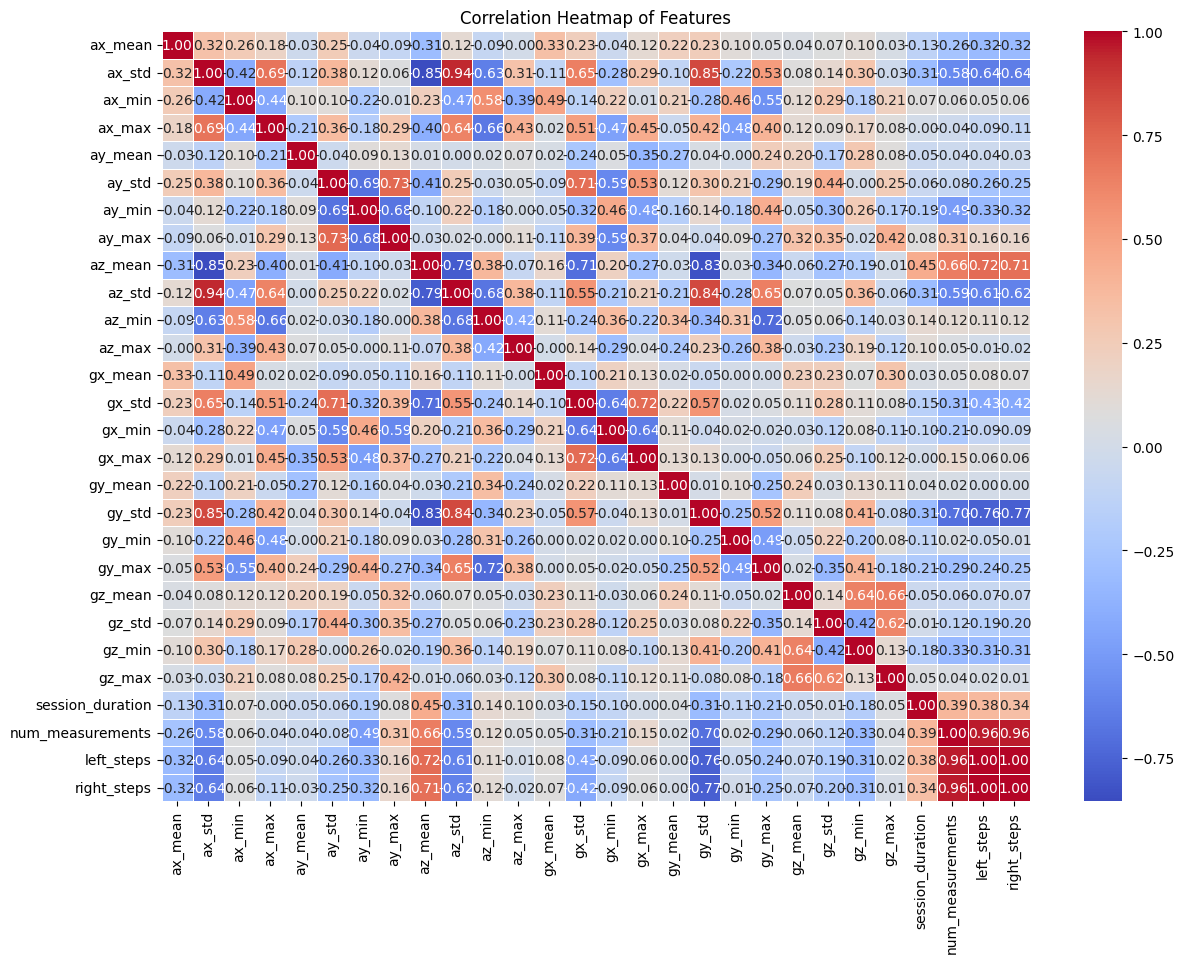

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop id column since it's not useful for correlation
df_corr = final_df.drop(columns=['id'])

# Set the figure size
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

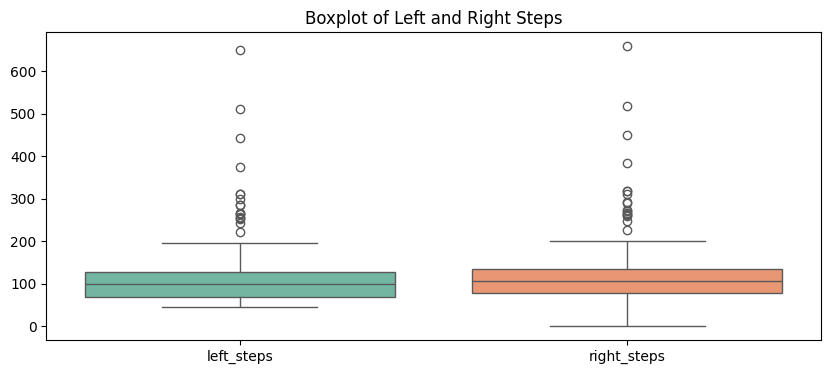

In [28]:
# Boxplots for step counts
plt.figure(figsize=(10, 4))
sns.boxplot(data=final_df[['left_steps', 'right_steps']], palette="Set2")
plt.title("Boxplot of Left and Right Steps")
plt.show()

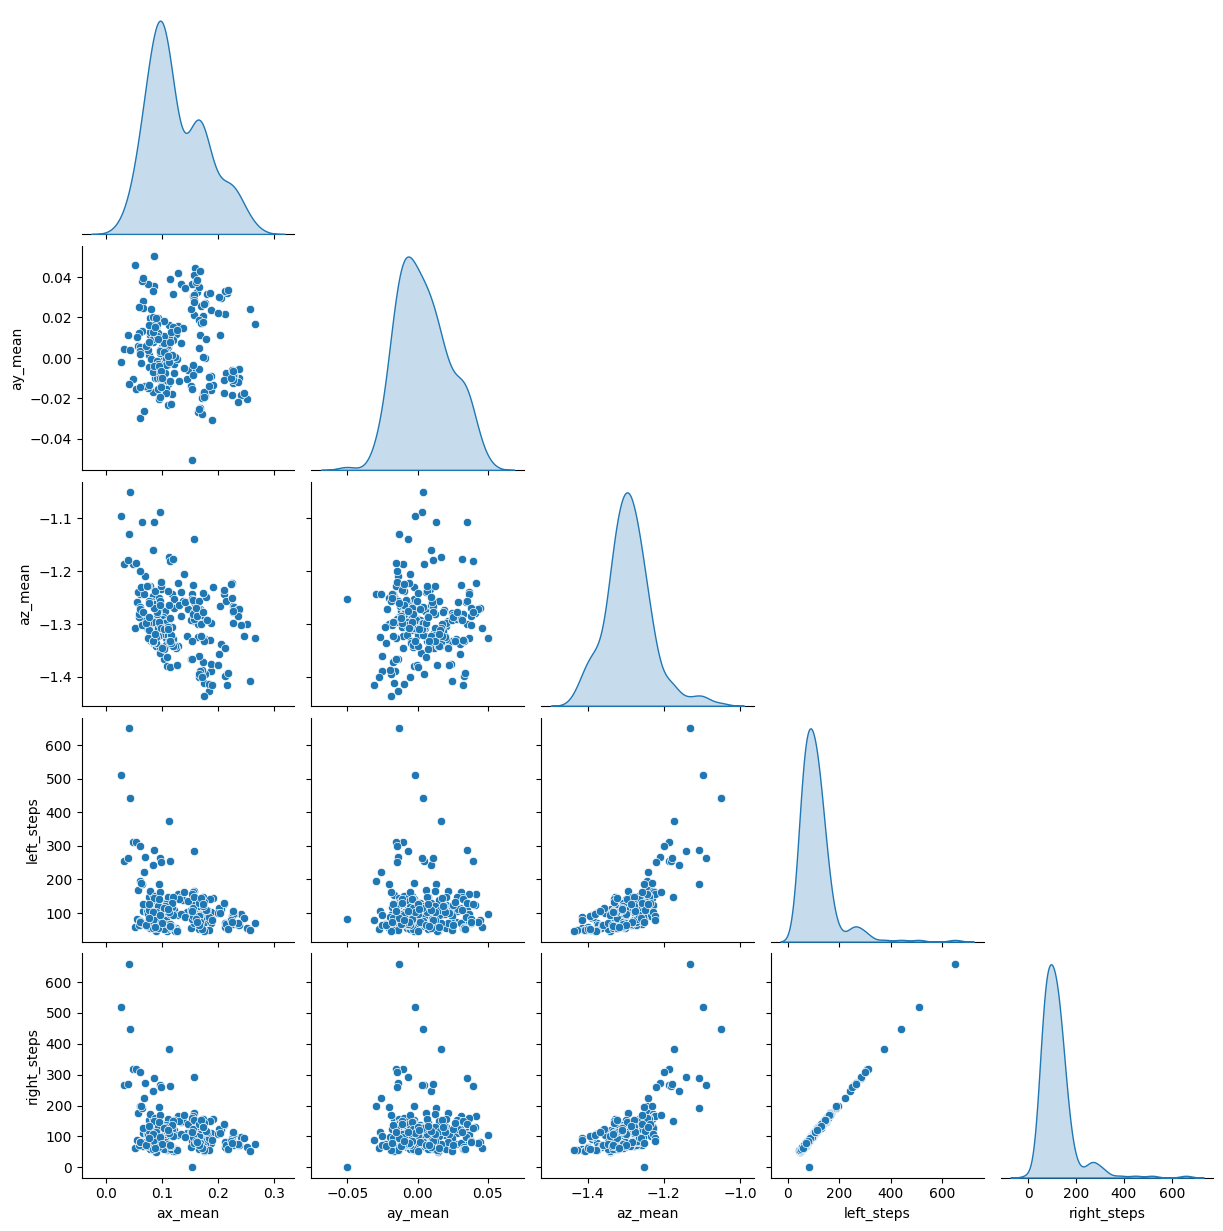

In [30]:
# Pairplot for acceleration and step counts
selected_features = ['ax_mean', 'ay_mean', 'az_mean', 'left_steps', 'right_steps']
sns.pairplot(final_df[selected_features], diag_kind="kde", corner=True)
plt.show()

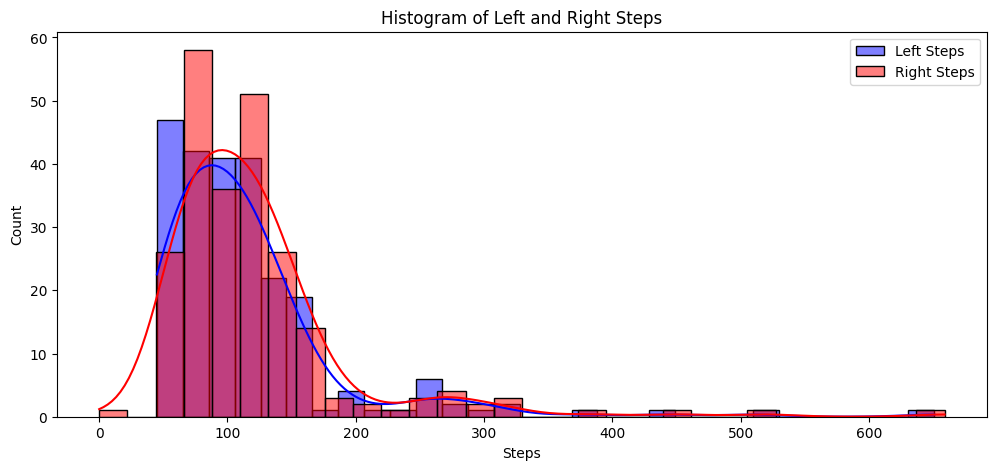

In [34]:
# Histogram of step counts
plt.figure(figsize=(12, 5))
sns.histplot(final_df['left_steps'], bins=30, kde=True, color='blue', label='Left Steps')
sns.histplot(final_df['right_steps'], bins=30, kde=True, color='red', label='Right Steps')
plt.xlabel('Steps')
plt.legend()
plt.title("Histogram of Left and Right Steps")
plt.show()